In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot



# **Heart Attack Prediction**


### **Task**

**To perform Exploratory Data Analysis (EDA) and predict if a person is prone to a heart attack or not.**

 ### **Data Dictionary**


age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [2]:
# 1.	Load this dataset into a Pandas DataFrame and perform data exploration using Pandas and NumPy.
df=pd.read_csv("heart.csv")
df = df.fillna(df.median())
nan_to_drop = list(df[(df["thal"].str.lower() == "nan")].index)

# df2=df["thal"].dropna(axis=0)
df = df.drop(labels=nan_to_drop, axis=0)

df.head()

# df definition
# df[df["chol"].isnull()].index


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,2,3,0.0
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,0,3,0.0
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,0,3,0.0
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,2,1,3,0.0
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,1,3,2,0.0


dataframe - is multydimensional array
<br>
series - 1d array

In [3]:
# df[df["thal"].isnull()].index
# df.groupby("thal").size()

df[(df["thal"].str.lower() == "nan")]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


[]

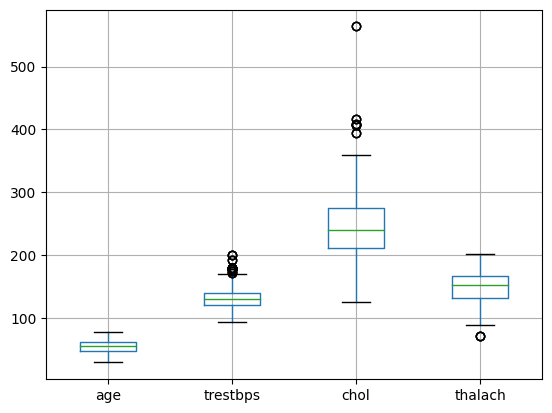

In [4]:
b_plot = df.boxplot(column = ['age', 'trestbps', 'chol',"thalach"]) 
b_plot.plot()

In [5]:
df.info

<bound method DataFrame.info of        age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0    1  0.0       125  212.0    0      1.0      168      0      1.0   
1     53.0    1  0.0       140  203.0    1      0.0      155      1      3.1   
2     70.0    1  0.0       145  174.0    0      1.0      125      1      2.6   
3     61.0    1  0.0       148  203.0    0      1.0      161      0      0.0   
4     62.0    0  0.0       138  294.0    1      1.0      106      0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0    1  1.0       140  221.0    0      1.0      164      1      0.0   
1021  60.0    1  0.0       125  258.0    0      0.0      141      1      2.8   
1022  47.0    1  0.0       110  275.0    0      0.0      118      1      1.0   
1023  50.0    0  0.0       110  254.0    0      0.0      159      0      0.0   
1024  54.0    1  0.0       120  188.0    0      1.0      113      0      1.4   

      s

In [6]:
# "Thal" column contains object type as well
df.dtypes

age         float64
sex           int64
cp          float64
trestbps      int64
chol        float64
fbs           int64
restecg     float64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target      float64
dtype: object

In [7]:
# 1.	How many rows and columns are there in the dataset?
rows, columns = df.shape # tuple unpacking
print("Heart dataset has rows: {} and columns:{}".format(rows,columns))

Heart dataset has rows: 1024 and columns:14


In [8]:
# 2.	What is the average age of the patients?
# mode
avrg_age = df.age.mean()
print(f"The avarage age is {avrg_age}")

The avarage age is 54.4384765625


In [9]:
# 3.	How many patients are male and how many are female?
df.groupby("sex").size().reset_index(name="Count_of_sexis")


,sex,Count_of_sexis
0,0,312
1,1,712


In [10]:
# 4.	What is the maximum value of cholesterol (chol) in the dataset?
max_chol = df.chol.max()
print(f"The max of cholesterol is {max_chol}")

The max of cholesterol is 564.0


In [11]:
# 5.	How many patients have a resting blood pressure (trestbps) greater than 140?
df[df["trestbps"] > 140]["trestbps"].count()


217

In [12]:
# 6.	Calculate the correlation between age and maximum heart rate achieved (thalach).
correlation = df["age"].corr(df["thalach"])
print(f"The correlation between age and maximum heart rate is {correlation}")

The correlation between age and maximum heart rate is -0.39047256873355574


In [13]:
# 7.	Create a new DataFrame with columns 'age', 'sex', 'chol', 'thalach', and 'target'.
new_df = df[['age', 'sex', 'chol', 'thalach', 'target']]
new_df

,age,sex,chol,thalach,target
0,52.0,1,212.0,168,0.0
1,53.0,1,203.0,155,0.0
2,70.0,1,174.0,125,0.0
3,61.0,1,203.0,161,0.0
4,62.0,0,294.0,106,0.0
...,...,...,...,...,...
1020,59.0,1,221.0,164,1.0
1021,60.0,1,258.0,141,0.0
1022,47.0,1,275.0,118,0.0
1023,50.0,0,254.0,159,1.0


In [14]:
# 8.	Add a new column 'chol_category' to the DataFrame based on the cholesterol values: 'normal' if chol < 200, 'borderline' if 200 <= chol < 240, and 'high' if chol >= 240.

# function to evaluate the conditions
def chol_cat(value):
  if value < 200:
    return 'normal'
  elif value >=200 and value < 240:
    return 'borderline'
  else:
    return 'high'

# passing the function by referance into apply 
df["chol_category"] = df["chol"].apply(chol_cat)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,2,3,0.0,borderline
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,0,3,0.0,borderline
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,0,3,0.0,normal
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,2,1,3,0.0,borderline
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,1,3,2,0.0,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1.0,140,221.0,0,1.0,164,1,0.0,2,0,2,1.0,borderline
1021,60.0,1,0.0,125,258.0,0,0.0,141,1,2.8,1,1,3,0.0,high
1022,47.0,1,0.0,110,275.0,0,0.0,118,1,1.0,1,1,2,0.0,high
1023,50.0,0,0.0,110,254.0,0,0.0,159,0,0.0,2,0,2,1.0,high


In [15]:
# 9.	Replace the target values: 0 as 'no disease' and 1 as 'disease' in the 'target' column.
df.replace({"target": {0: "no disease", 1: "disease"}}, inplace=True)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_category
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,2,3,no disease,borderline
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,0,3,no disease,borderline
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,0,3,no disease,normal
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,2,1,3,no disease,borderline
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,1,3,2,no disease,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1.0,140,221.0,0,1.0,164,1,0.0,2,0,2,disease,borderline
1021,60.0,1,0.0,125,258.0,0,0.0,141,1,2.8,1,1,3,no disease,high
1022,47.0,1,0.0,110,275.0,0,0.0,118,1,1.0,1,1,2,no disease,high
1023,50.0,0,0.0,110,254.0,0,0.0,159,0,0.0,2,0,2,disease,high


In [16]:
# 10.	Create a crosstab to show the relationship between 'sex' and 'target'.
pd.crosstab(df.sex, df.target)

target,disease,no disease
sex,,
0,226,86
1,299,413


In [17]:
# 11.	Calculate the mean and standard deviation of 'oldpeak' for each target class.
oldpeak_mean = df["oldpeak"].mean()
oldpeak_std = df["oldpeak"].std()
print(f"Oldpeak mean is {oldpeak_mean} and oldpeak standard deviation is {oldpeak_std}")


Oldpeak mean is 1.06796875 and oldpeak standard deviation is 1.1720053976001603


In [18]:
# 12.	Replace the 'thal' values with corresponding strings: 1 as 'fixed defect', 2 as 'normal', 3 as 'reversible defect'.

# because data is inconsistent I get one of the value as Nan, so I got this fix
df['thal'] = df['thal'].astype(str)
df.replace({"thal": {"0": "defect", "1": "fixed defect", "2": "normal", "3":"reversible defect"}}, inplace=True)



In [19]:
# Check if there are other values inside thal column
df.groupby("thal").size()

# df[df["chol"].isnull()].index

thal
2.0                    1
defect                 7
fixed defect          64
normal               542
reversible defect    410
dtype: int64

In [20]:
# 13.	Drop the 'slope' column from the DataFrame.
df = df.drop('slope', axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,chol_category
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,reversible defect,no disease,borderline
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,reversible defect,no disease,borderline
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,reversible defect,no disease,normal
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,1,reversible defect,no disease,borderline
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,3,normal,no disease,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1.0,140,221.0,0,1.0,164,1,0.0,0,normal,disease,borderline
1021,60.0,1,0.0,125,258.0,0,0.0,141,1,2.8,1,reversible defect,no disease,high
1022,47.0,1,0.0,110,275.0,0,0.0,118,1,1.0,1,normal,no disease,high
1023,50.0,0,0.0,110,254.0,0,0.0,159,0,0.0,0,normal,disease,high


In [21]:
nan_to_drop = list(df[df["thal"].str.lower() == "nan"].index)

# df2=df["thal"].dropna(axis=0)
df2 = df.drop(labels=nan_to_drop, axis=0)

df2[df2["thal"].str.lower() == "nan"]
# df[df["thal"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,chol_category


In [22]:
# Check if there are any null values
print(df.isnull().sum())

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
ca               0
thal             0
target           0
chol_category    0
dtype: int64


In [23]:
# 14.	Split the DataFrame into input features (X) and the target variable (y).

# Many Machine Learning models do not handle Categorical data (Strings). Nonetheless, it is needed to be converted to numerical.
from sklearn import preprocessing
# fit_transform will replace Categorical data with a numerical data
df[["thal","target","chol_category"]] = df[["thal","target","chol_category"]].apply(preprocessing.LabelEncoder().fit_transform)

# df[["thal","target","chol_category"]] = df[["thal","target","chol_category"]].apply(preprocessing.LabelEncoder().inverse_transform) to retrieve

y = df["target"]
X = df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,chol_category
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,4,0
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,4,0
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,4,2
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,1,4,0
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1.0,140,221.0,0,1.0,164,1,0.0,0,3,0
1021,60.0,1,0.0,125,258.0,0,0.0,141,1,2.8,1,4,1
1022,47.0,1,0.0,110,275.0,0,0.0,118,1,1.0,1,3,1
1023,50.0,0,0.0,110,254.0,0,0.0,159,0,0.0,0,3,1


In [24]:
# 15.	Normalize the input features using Min-Max scaling.


# This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,0.50,1.00,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.00,1.00,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,1.00,1.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,0.25,1.00,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.75,0.75,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,0.00,0.75,0.0
1020,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.25,1.00,0.5
1021,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.25,0.75,0.5
1022,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,0.00,0.75,0.5


In [25]:
# Machine learning questions
# 1.	Split the data into training and testing sets (80-20 ratio) for all features (X) and the target variable (y).
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns=['target'])
y = df['target']

# making shore there are no object types
X.dtypes

age              float64
sex                int64
cp               float64
trestbps           int64
chol             float64
fbs                int64
restecg          float64
thalach            int64
exang              int64
oldpeak          float64
ca                 int64
thal               int32
chol_category      int32
dtype: object

In [26]:

# Split the data into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# 2.	Build a K-Nearest Neighbors (KNN) classifier with k=5 and train it on the training data.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# Optionally, you can also calculate the training accuracy
y_pred = knn.predict(X_test)
training_accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", training_accuracy_knn)

KNN Accuracy: 0.697560975609756


In [29]:
# 4.	Build a Decision Tree classifier and train it on the training data.
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
clf  = dt_classifier.fit(X_train, y_train)


In [30]:
# 5.	Evaluate the Decision Tree classifier on the testing data and calculate its accuracy.
from sklearn import metrics

y_pred = clf.predict(X_test)

decis_tree_acc = metrics.accuracy_score(y_test, y_pred)

# decis_tree_acc = clf.score(X_train, y_train)
print("Accuracy:",decis_tree_acc)

Accuracy: 0.9707317073170731


In [31]:
# 6.	Build a Logistic Regression classifier and train it on the training data.
logreg = LogisticRegression(random_state=42)

# Train a Logistic Regression model
logreg.fit(X_train, y_train)

c:\Users\Bogdan Madalina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [32]:
# 7.	Evaluate the Logistic Regression classifier on the testing data and calculate its accuracy.
y_pred = logreg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log}")

Accuracy: 0.8634146341463415


In [33]:
# 8.	Compare the accuracies of all three classifiers (KNN, Decision Tree, Logistic Regression).
# training_accuracy_knn
# accuracy_log
# decis_tree_acc
print(f"knn: {training_accuracy_knn}, Decision Tree: {decis_tree_acc}, Logistic Regression: {accuracy_log},the biggest: ", max([training_accuracy_knn, decis_tree_acc, accuracy_log]))

knn: 0.697560975609756, Decision Tree: 0.9707317073170731, Logistic Regression: 0.8634146341463415,the biggest:  0.9707317073170731


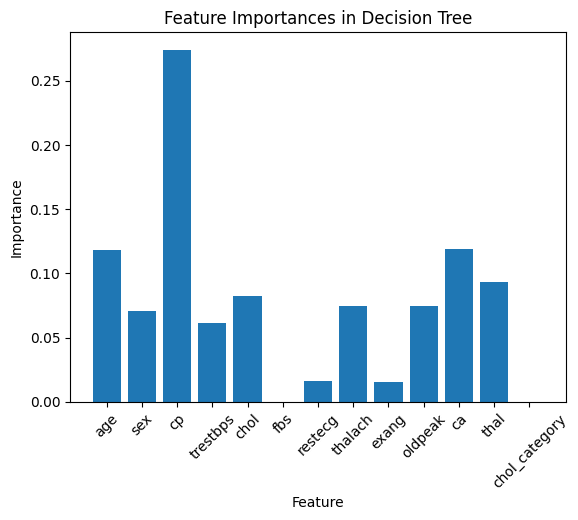

In [34]:
# 9.	Plot a bar chart to show the feature importances in the Decision Tree classifier.

# get feature names
feature_names = X.columns

# get importance
importance = dt_classifier.feature_importances_
 
# plot feature importance
pyplot.bar(feature_names, importance)
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
pyplot.show()

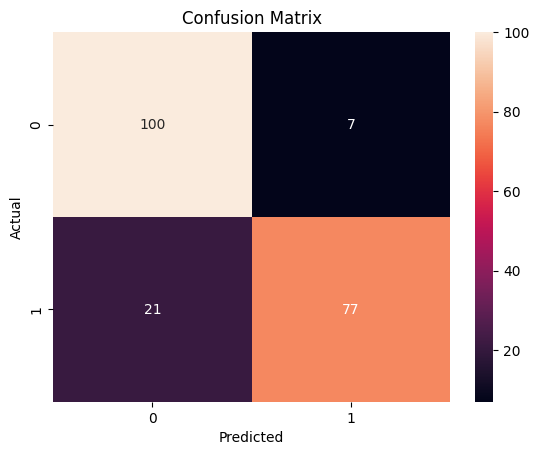

In [35]:
# 10.	Visualize the confusion matrix for the Logistic Regression classifier. 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
# 11.	Calculate precision, recall, and F1-score for the Logistic Regression classifier.
from sklearn.metrics import classification_report


y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.92      0.79      0.85        98

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [37]:
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC score: {roc_auc}")

AUC score: 0.9151249284760633


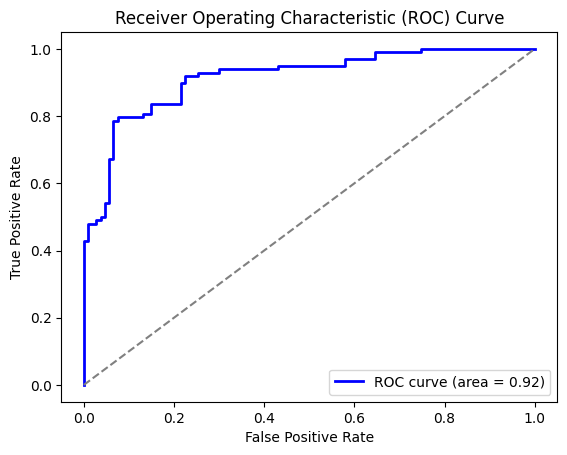

In [38]:
# 12.	Plot an ROC curve for the Logistic Regression classifier and calculate the AUC score.
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# 13.	Use cross-validation (k=5) to evaluate the Decision Tree classifier and report the mean accuracy.
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 mean accuracy with a standard deviation of 0.04


In [40]:
# 14.	Perform feature scaling using StandardScaler and train the KNN classifier again. Compare its accuracy with the previous result.
standard_scaler = StandardScaler()

# StandardScaler returns a numpy.ndarray of feature values and I need to convert it back to pandas.DataFrame with the same column names.
X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X_test.columns)

X_train_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,chol_category
0,-0.821759,0.662848,0.990388,0.406922,0.202907,-0.410282,-0.973000,0.308111,-0.709050,-0.925348,-0.735621,-0.541861,0.218165
1,1.401633,0.662848,-0.924908,-0.644769,-0.179690,-0.410282,0.919843,-3.408596,-0.709050,-0.058330,-0.735621,-0.541861,-1.246401
2,0.956955,0.662848,1.948036,0.815914,-0.256209,2.437351,-0.973000,0.045755,-0.709050,1.068792,-0.735621,-2.173419,-1.246401
3,0.956955,-1.508642,0.990388,0.231640,0.107258,-0.410282,-0.973000,1.007726,-0.709050,-0.925348,-0.735621,-0.541861,0.218165
4,-0.932929,0.662848,0.032740,-1.754889,-0.944883,2.437351,0.919843,0.308111,-0.709050,-0.925348,-0.735621,1.089698,1.682731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0.845785,0.662848,0.032740,-0.644769,0.662023,-0.410282,-0.973000,-2.009366,-0.709050,0.288476,0.229882,1.089698,0.218165
815,-1.155268,0.662848,0.032740,-0.644769,0.317686,-0.410282,0.919843,1.051452,-0.709050,-0.925348,-0.735621,1.089698,0.218165
816,1.068124,0.662848,0.990388,0.523777,1.695035,-0.410282,0.919843,0.395562,-0.709050,-0.925348,-0.735621,-0.541861,0.218165
817,0.512276,-1.508642,-0.924908,2.510306,0.049868,-0.410282,0.919843,-0.260327,1.410337,-0.925348,-0.735621,-0.541861,0.218165


In [41]:

# Initialize the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier on the training data
knn.fit(X_train_scaled, y_train)

y_pred_standard = knn.predict(X_test_scaled)

# Optionally, you can also calculate the training accuracy
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f"StandardScaler Training Accuracy: {accuracy_standard} and no scaler Accuracy: {training_accuracy_knn}")



StandardScaler Training Accuracy: 0.8390243902439024 and no scaler Accuracy: 0.697560975609756


In [42]:
# # 15.	Implement GridSearchCV to find the best hyperparameters for the Logistic Regression classifier (C and penalty) using a 5-fold cross-validation.

from sklearn.model_selection import GridSearchCV
import warnings

# ignore warnings
warnings.filterwarnings('ignore')

# define the hyperparameters to be checked
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [43]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds
# will calculte best paramaters for logistic regression  
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [44]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8461469399970074


In [45]:
# Use logistic regression with hyperparameters
logreg = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear')

# Train the logistic classifier on the training data
logreg.fit(X_train,y_train)

# Get prediction

y_pred = logreg.predict(X_test)
print("Accuracy:",logreg.score(X_test, y_test))

Accuracy: 0.8536585365853658


In [46]:
# 16.	Apply the trained Logistic Regression model on the following new data:
mylist = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1 ]

X_feature_values = np.array(mylist)
X_feature_values=X_feature_values.reshape(1, -1)

In [47]:
y_pred_log = logreg.predict(X_feature_values)
y_pred_log[0]

0

In [48]:
# 17.	Apply the Decision Tree classifier on the same data and compare the predicted target.
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
clf  = dt_classifier.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_DT = clf.predict(X_feature_values)
y_pred_DT[0]

0

In [49]:
# 18.	Calculate the Pearson correlation coefficient between 'thalach' and 'oldpeak'.
from scipy.stats.stats import pearsonr
# df.fillna(df.mean(), inplace=True)
df.dropna(subset=['oldpeak'], inplace=True)

thalach_col = df['thalach'].values
oldpeak_col = df['oldpeak'].values
corr, _  = pearsonr(thalach_col, oldpeak_col)

print(f"Pearson correlation {corr} \n")


# using pandas
print("Using pandas:")
data = df[["thalach","oldpeak"]]
correlation = data.corr(method='pearson')
print(correlation, "\n")

# using numpy
my_rho = np.corrcoef(thalach_col, oldpeak_col)
print(f"Numpy: \n {my_rho}")

Pearson correlation -0.35004295933186846 

Using pandas:
          thalach   oldpeak
thalach  1.000000 -0.350043
oldpeak -0.350043  1.000000 

Numpy: 
 [[ 1.         -0.35004296]
 [-0.35004296  1.        ]]


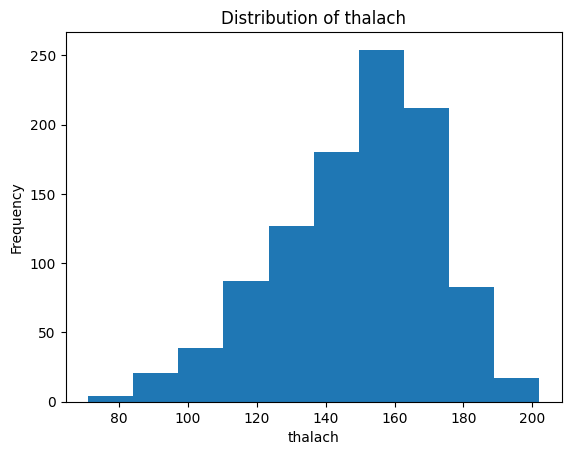

In [50]:
# 19.	Visualize the distribution of 'thalach' using a histogram.

plt.hist(df["thalach"], bins=10)
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.title('Distribution of thalach')
plt.show()

In [53]:
# 20. Create a box plot to show the distribution of 'chol_category' across the target classes.

# function to evaluate the conditions
def chol_cat(value):
  if value < 200:
    return 'normal'
  elif value >=200 and value < 240:
    return 'borderline'
  else:
    return 'high'

# passing the function by referance into apply 
df["chol_category"] = df["chol"].apply(chol_cat)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target,chol_category
0,52.0,1,0.0,125,212.0,0,1.0,168,0,1.0,2,4,1,borderline
1,53.0,1,0.0,140,203.0,1,0.0,155,1,3.1,0,4,1,borderline
2,70.0,1,0.0,145,174.0,0,1.0,125,1,2.6,0,4,1,normal
3,61.0,1,0.0,148,203.0,0,1.0,161,0,0.0,1,4,1,borderline
4,62.0,0,0.0,138,294.0,1,1.0,106,0,1.9,3,3,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1.0,140,221.0,0,1.0,164,1,0.0,0,3,0,borderline
1021,60.0,1,0.0,125,258.0,0,0.0,141,1,2.8,1,4,1,high
1022,47.0,1,0.0,110,275.0,0,0.0,118,1,1.0,1,3,1,high
1023,50.0,0,0.0,110,254.0,0,0.0,159,0,0.0,0,3,0,high


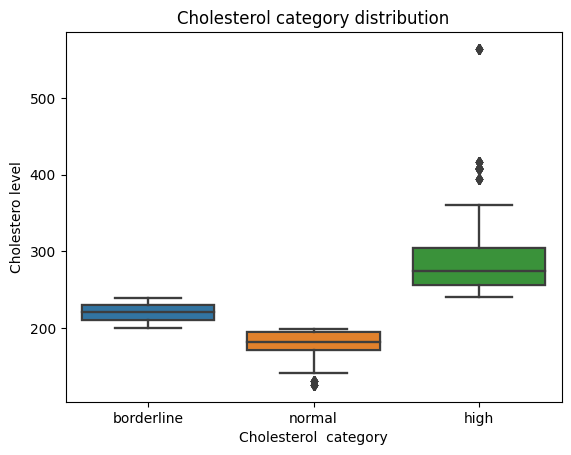

In [57]:
import seaborn as sns

sns.boxplot(x="chol_category", y="chol", data = df)
plt.xlabel("Cholesterol  category")
plt.ylabel("Cholestero level")
plt.title("Cholesterol category distribution")
plt.show()